# Data Processing

In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

# Build an Autoencoder model

In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

# Train the autoencoder

In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2542 - val_loss: 0.1678
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1519 - val_loss: 0.1360
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1304 - val_loss: 0.1234
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1216 - val_loss: 0.1165
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1159 - val_loss: 0.1121
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1120 - val_loss: 0.1088
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1088 - val_loss: 0.1058
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1061 - val_loss: 0.1035
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1040 - val_loss: 0.1017
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1024 - val_loss: 0.1003
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1011 - val_loss: 0.0990
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

# Evaluate the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


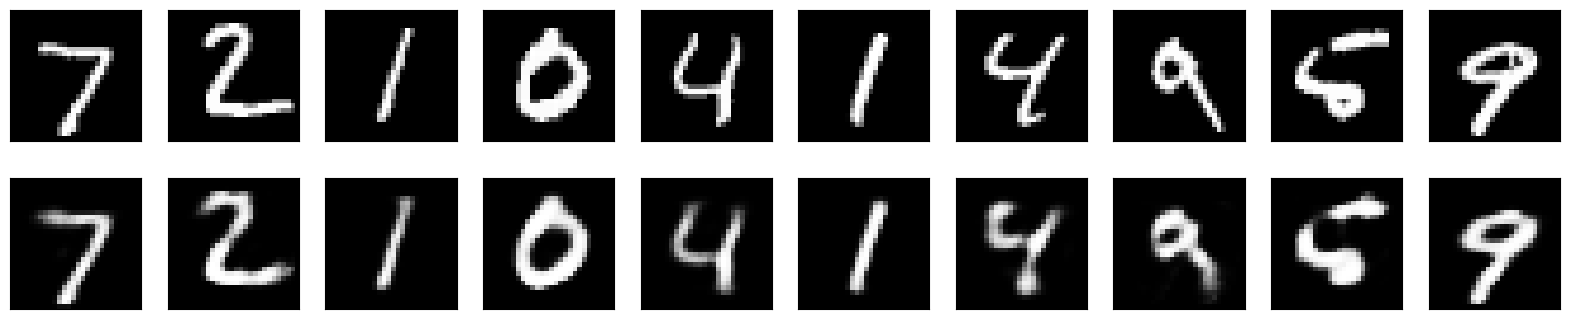

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

# Fine-tune the model

In [5]:
# Freeze all layers of the autoencoder
for layer in autoencoder.layers:
    layer.trainable = False

In [6]:
# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable = {layer.trainable}")

Layer 0: input_layer, Trainable = False
Layer 1: dense, Trainable = False
Layer 2: dense_1, Trainable = False
Layer 3: dense_2, Trainable = False
Layer 4: dense_3, Trainable = False


In [7]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0924 - val_loss: 0.0909
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0920 - val_loss: 0.0908
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0918 - val_loss: 0.0907
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0917 - val_loss: 0.0906
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0915 - val_loss: 0.0903
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0913 - val_loss: 0.0902
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0911 - val_loss: 0.0899
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0909 - val_loss: 0.0898
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0907 - val_loss: 0.0896
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0905 - val_loss: 0.0894


# Denoise the images with Autoencoder

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1749 - val_loss: 0.1445
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1398 - val_loss: 0.1342
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1326 - val_loss: 0.1294
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1289 - val_loss: 0.1268
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1266 - val_loss: 0.1251
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1252 - val_loss: 0.1238
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1242 - val_loss: 0.1231
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1235 - val_loss: 0.1226
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1229 - val_loss: 0.1221
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1226 - val_loss: 0.1218
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1222 - val_loss: 0.1217
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 

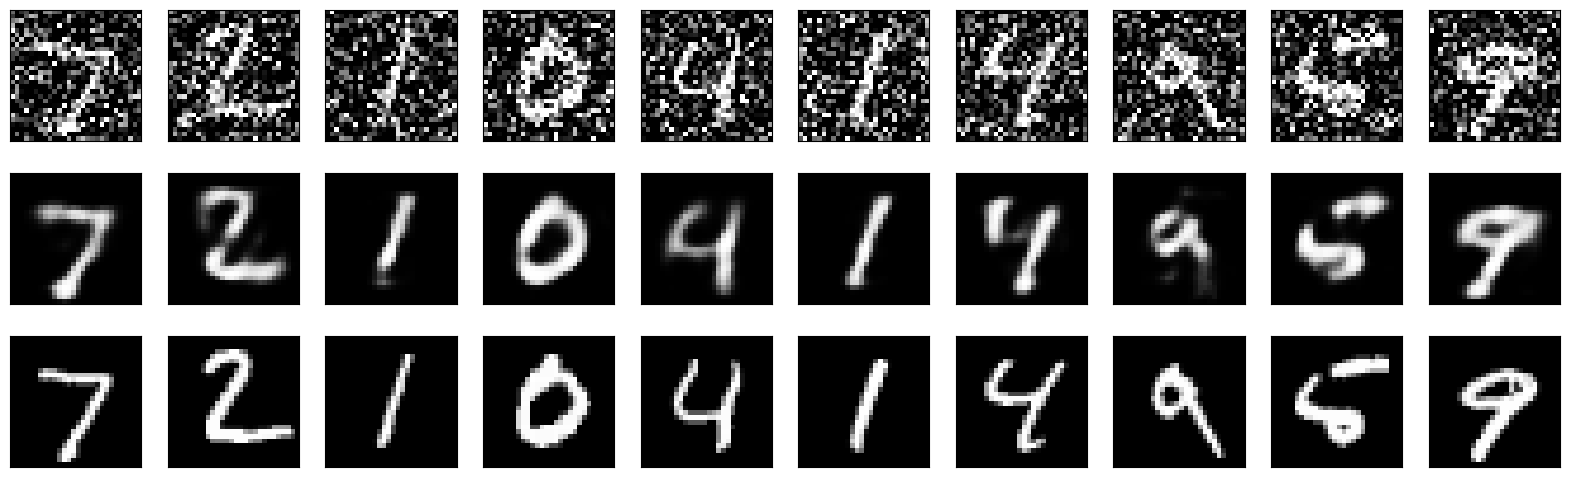

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()